<a href="https://colab.research.google.com/github/yipf1123/human_edu/blob/main/Transcriptuon/%EA%B1%B4%EC%84%A4%EA%B8%B0%EA%B3%84_%EC%98%A4%EC%9D%BC_%EC%83%81%ED%83%9C_%EB%B6%84%EB%A5%98_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contents
1. 라이브러리 호출 및 I/O
2. Original Feature 분석
3. 데이터 전처리
4. 데이터 시각화
5. 결론

# **1. 라이브러리 호출 및 I/O**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/pilsaData/건설기계  오일/'

## Import Library

In [3]:
import numpy as np # 수치 계산 패키지
from sklearn.preprocessing import RobustScaler # 데이터 전처리 모듈

import matplotlib.pyplot as plt # 그래프 그리기 패키지
plt.style.use('fivethirtyeight') #아메리칸 뉴스 미디어인 FiveThirtyEight가 사용하는 색상과 폰트, 레이아웃 등을 따라 만들어짐
import seaborn as sns # matplotlib 기반의 시각화 패키지

import warnings # 경고 메세지 제어 패키지
warnings.filterwarnings('ignore') # 경고 메세지를 무시하도록 설정
 
pd.set_option("display.max_columns", 100) # 데이터프레임의 출력 옵션을 설정

###RobustScaler

는 데이터의 중앙값(median)과 사분위 범위(IQR)를 사용하여 데이터를 스케일링합니다. 이 방법은 데이터에서 이상치(outlier)가 있을 경우에도 제대로 작동하기 때문에, 이상치가 있는 데이터에 대해서도 안정적인 결과를 제공합니다

RobustScaler는 아래와 같은 수식으로 데이터를 스케일링합니다:

(x - median) / IQR

여기서, x는 스케일링할 데이터 포인트, median은 해당 데이터의 중앙값, IQR은 해당 데이터의 사분위 범위를 나타냅니다.

이 방법을 사용하면 데이터의 분포가 정규 분포가 아니더라도, 각 피처(Feature)가 비슷한 범위로 스케일링됩니다. 





### 스케일링(Scaling)
스케일링(Scaling)은 데이터 전처리(preprocessing) 과정 중 하나로, 데이터의 범위(scale)를 조정하는 것을 말합니다. 스케일링은 일반적으로 모든 피처(Feature)의 값을 비슷한 범위로 맞춰주는 것이 목적입니다.

스케일링을 하지 않으면, 서로 다른 범위의 값을 가진 피처들은 서로 다른 중요도를 가질 수 있습니다. 예를 들어, 키(cm)와 몸무게(kg)를 가진 데이터셋에서, 키는 보통 150 ~ 200 cm 사이의 값이지만, 몸무게는 40 ~ 150 kg 사이의 값이 될 수 있습니다. 이 경우, 몸무게가 더 큰 범위를 가지므로, 몸무게가 키보다 더 중요하게 취급될 가능성이 있습니다.

스케일링을 통해 데이터를 조정하면, 각 피처들의 중요도를 더욱 공정하게 평가할 수 있습니다.


스케일링은 주로 다음과 같은 이유로 사용됩니다:

1. 다양한 단위를 가지는 특성들의 영향력 차이를 줄이기 위해
2. 변수 간 상대적인 중요도를 측정하기 위해
3. 최적화 알고리즘의 수렴 속도 및 성능 향상을 위해

##Load Data

In [4]:
train = pd.read_csv('/content/drive/MyDrive/pilsaData/건설기계  오일/train.csv')
test = pd.read_csv('/content/drive/MyDrive/pilsaData/건설기계  오일/test.csv')
train.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,0,3059,0.0,0,13,78,NaN,NaN,NaN,NaN,NaN,NaN,888,NaN,0.0,27.0,1,14,16,1,16,6,1951,0,8504,21370,0,427,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,0,2978,0.0,0,0,31,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,NaN,0,1,0,0,1,0,572,2,19,1117,0,0,0,NaN,0,0.0,0.0,1.0,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,0,17,0.0,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,0.0,0.0,0,0,0,0,2,0,328,0,17,1334,0,0,1,NaN,0,0.0,0.0,0.0,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,0,1960,0.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,0.0,NaN,0,4,1,0,0,0,906,1,44,21774,2,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,0,71,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,0.0,0.0,0,0,0,0,2,0,309,0,217,18470,0,2,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [5]:
# show dataframe for each features that we have
dataFeatures =[]
dataType =[]
null =[]
nullPCT = []
unique = []
minValue =[]
maxValue =[]
uniqueSample =[]

for item in list(train): 
  dataFeatures.append(item) # train 데이터프레임의 모든 열 이름이 dataFeatures에 저장

for item in dataFeatures: #train 데이터프레임의 각 열의 데이터 타입이 dataType에 저장
   dataType.append(train[item].dtype.name)

for item in dataFeatures: # train 데이터프레임의 각 열에서 결측값(null)의 개수가 null에 저장
  null.append(len(train[train[item].isnull() == True]))

for item in dataFeatures: # train 데이터프레임의 각 열에서 결측값의 비율이 nullPCT에 저장
  nullPCT.append(round(len(train[train[item].isnull() == True])/len(train[item])*100,2))

for item in dataFeatures: # train 데이터프레임의 각 열에서 최소값이 minValue에 저장
    minValue.append(train[item].min())

for item in dataFeatures: # train 데이터프레임의 각 열에서 최대값이 maxValue에 저장
  maxValue.append(train[item].max())

for item in dataFeatures: # train 데이터프레임의 각 열에서 고유한 값의 개수가  unique에 저장
  unique.append(train[item].nunique())

for item in dataFeatures: # train 데이터프레임의 각 열에서 가장 처음 두 개의 고유한 값이 uniqueSample에 저장
  uniqueSample.append(train[item].unique()[0:2])

train_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT' : nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample' : uniqueSample
})

train_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,ID,object,0,0.00,14095,TRAIN_00000,TRAIN_14094,"[TRAIN_00000, TRAIN_00001]"
1,COMPONENT_ARBITRARY,object,0,0.00,4,COMPONENT1,COMPONENT4,"[COMPONENT3, COMPONENT2]"
2,ANONYMOUS_1,int64,0,0.00,2951,1000,294451,"[1486, 1350]"
3,YEAR,int64,0,0.00,16,2007,2022,"[2011, 2021]"
4,SAMPLE_TRANSFER_DAY,int64,0,0.00,107,0,368,"[7, 51]"
5,ANONYMOUS_2,int64,0,0.00,842,200,9650,"[200, 375]"
6,AG,int64,0,0.00,4,0,3,"[0, 1]"
7,AL,int64,0,0.00,328,0,4630,"[3, 2]"
8,B,int64,0,0.00,504,0,2051,"[93, 19]"
9,BA,int64,0,0.00,38,0,216,"[0, 1]"


In [6]:
test.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469


In [7]:
# show dataframe for each features that we have
dataFeatures =[]
dataType =[]
null =[]
nullPCT = []
unique = []
minValue =[]
maxValue =[]
uniqueSample =[]

for item in list(test): 
  dataFeatures.append(item) # train 데이터프레임의 모든 열 이름이 dataFeatures에 저장

for item in dataFeatures: #train 데이터프레임의 각 열의 데이터 타입이 dataType에 저장
   dataType.append(test[item].dtype.name)

for item in dataFeatures: # train 데이터프레임의 각 열에서 결측값(null)의 개수가 null에 저장
  null.append(len(test[test[item].isnull() == True]))

for item in dataFeatures: # train 데이터프레임의 각 열에서 결측값의 비율이 nullPCT에 저장
  nullPCT.append(round(len(test[test[item].isnull() == True])/len(train[item])*100,2))

for item in dataFeatures: # train 데이터프레임의 각 열에서 최소값이 minValue에 저장
    minValue.append(test[item].min())

for item in dataFeatures: # train 데이터프레임의 각 열에서 최대값이 maxValue에 저장
  maxValue.append(test[item].max())

for item in dataFeatures: # train 데이터프레임의 각 열에서 고유한 값의 개수가  unique에 저장
  unique.append(test[item].nunique())

for item in dataFeatures: # train 데이터프레임의 각 열에서 가장 처음 두 개의 고유한 값이 uniqueSample에 저장
  uniqueSample.append(test[item].unique()[0:2])

test_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT' : nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample' : uniqueSample
})

test_info # 데이터프레임의 정보에 대한 내부 데이터의 속성을 보여줌

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,ID,object,0,0.0,6041,TEST_0000,TEST_6040,"[TEST_0000, TEST_0001]"
1,COMPONENT_ARBITRARY,object,0,0.0,4,COMPONENT1,COMPONENT4,"[COMPONENT1, COMPONENT3]"
2,ANONYMOUS_1,int64,0,0.0,2264,1000,239570,"[2192, 2794]"
3,YEAR,int64,0,0.0,16,2007,2022,"[2016, 2011]"
4,ANONYMOUS_2,int64,0,0.0,629,200,9650,"[200, 473]"
5,AG,int64,0,0.0,3,0,2,"[0, 1]"
6,CO,int64,0,0.0,6,0,13,"[0, 1]"
7,CR,int64,0,0.0,80,0,1415,"[0, 2]"
8,CU,int64,0,0.0,374,0,4113,"[1, 16]"
9,FE,int64,0,0.0,891,0,30407,"[12, 278]"


# **2. Original Feature 분석**

In [8]:
print(train.shape)
print(test.shape)

(14095, 54)
(6041, 19)


##Train data Column 설명

In [9]:
train.info() # 데이터프레임의 정보를 요약하여 보여줌

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

### Train 데이터의 각 Feature의 의미
- ID : ID
- COMPONENT_ARBITRARY : sample 오일 관련 부품 (Component 4종)
- ANONYMOUS_1 : 무명 Feature 1, 수치형 데이터
- YEAR : 오일 진단 년도(Year)
- SAMPLE_TRANSFER_DAY : 오일 샘플링 후 진단 기관으로 이동한 기간(Days)
- ANONYMOUS_2 : 무명 Feature 2, 수치형 데이터
- AG : 은(Silver) 함유량
- AL : 알루미늄(Aluminium) 함유량
- B : 붕소(Boron) 함유량
- BA : 바륨(Barium) 함유량
- BE : 베릴륨(Beryllium) 함유량
- CA : 칼슘(Calcium) 함유량
- CD : 카드뮴(Cadmium) 함유량
- CO : 코발트(Cobolt) 함유량
- CR : 크로뮴(Chromium) 함유량
- CR : 구리(Copper) 함유량
- FH2O : 물(Water) 수치(By FT-IR)
- FNOX : 질소산화물(Nox) 수치(By FT-IR)
- FOPTIMETHGLY : 비식별화
- FOXID : 산화(Oxidation) 수치(By FT-IR)
- FSO4 : 황산염(S04) 수치(By FT-IR)
- FTBN : 염기성 첨가제물질 수치(By FT-IR)
- FE : 철(Iron) 함유량
- FUEL : 연료 함유량
- H2O : 물 함유량
- K : 칼륨(Potassium) 함유량
- LI : 리튬(Lithium) 함유량
- MG : 마그네슘(Magnesium) 함유량
- MN : 망가니즈(Manganese) 함유량
- MO : 몰리브덴(Molybdenum) 함유량
- NA : 나트륨(Sodium) 함유량
- NI : 니켈(Nickel) 함유량
- P : 인(Phosphorus) 함유량
- PB : 납(Lead) 함유량
- PQINDEX : 입자 정량화 지수(Particle Quantifier Index)
- S : 황(Sulphur) 함유량
- SB : 안티몬(Antimony) 함유량
- SI : 규소(Silicone) 함유량
- SN : 주석(Tin) 함유량
- SOOTPERCENTAGE : 그을음 정도
- TI : 티타늄(Titanium) 함유량
- U100 : 100㎛ 이상 입자 크기(Particle Count)
- U75 : 75㎛ 이상 입자 크기(Particle Count)
- U50 : 50㎛ 이상 입자 크기(Particle Count)
- U25 : 25㎛ 이상 입자 크기(Particle Count)
- U20 : 20㎛ 이상 입자 크기(Particle Count)
- U14 : 14㎛ 이상 입자 크기(Particle Count)
- U6 : 6㎛ 이상 입자 크기(Particle Count)
- U4 : 4㎛ 이상 입자 크기(Particle Count)
- V : 바나듐(Vanadium) 함유량
- V100 : 점도(Viscosity) @ 100 degrees
- V40 : 점도(Viscosity) @ 40 degrees
- ZN : 아연(Zinc) 함유량
- Y_LABEL : 오일 정상 여부(0 : 정상, 1 : 이상)




In [10]:
# Y_LABEL을 int형에서 object형으로 변환
train = train.astype({'Y_LABEL':'object'})

#**3.데이터 전처리**

## 결측치 확인
Train 데이터의 Feature 중 Test 데이터에 존재하지 않는 Feature는 대부분 결측치

### 결측치(missing value)
데이터가 누락되어 비어 있는 값

결측치는 분석 결과에 영향을 미치기 때문에, 결측치 처리(missing value imputation)가 필요합니다. 일반적인 결측치 처리 방법으로는 다음과 같은 방법들이 있습니다.

- 결측치가 포함된 데이터를 삭제하는 방법
- 결측치를 대체할 수 있는 다른 값으로 대체하는 방법 (예: 평균값, 중앙값, 최빈값 등)
- 모델링 기법을 사용하여 결측치를 대체하는 방법

In [11]:
train.isnull().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                      1394
CO                         0
CR                         0
CU                         0
FH2O                   10205
FNOX                   10205
FOPTIMETHGLY           10205
FOXID                  10205
FSO4                   10205
FTBN                   10205
FE                         0
FUEL                   10205
H2O                        0
K                       2299
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX       

In [12]:
test.isnull().sum()

ID                     0
COMPONENT_ARBITRARY    0
ANONYMOUS_1            0
YEAR                   0
ANONYMOUS_2            0
AG                     0
CO                     0
CR                     0
CU                     0
FE                     0
H2O                    0
MN                     0
MO                     0
NI                     0
PQINDEX                0
TI                     0
V                      0
V40                    0
ZN                     0
dtype: int64

## 결측치 제거
 결측치 비율이 20%가 넘는 Column 제거

 결측치가 많은 열(column)들은 분석에 필요하지 않은 정보를 제공할 가능성이 높으므로 삭제하는 것이 분석 결과의 정확성을 높일 수 있습니다.

In [13]:
percent20UP = list(train_info[train_info['nullPCT'] >= 20.0]['dataFeatures'])
# ['dataFeatures']는 해당 데이터프레임에서 'dataFeatures' 열만을 선택한 시리즈(Series) 객체
train = train.drop(percent20UP, axis=1)
# axis=1은 열(column)을 기준으로 삭제

In [14]:
print(train.shape)

(14095, 37)


In [15]:
# 제거된 featrue list
percent20UP

['FH2O',
 'FNOX',
 'FOPTIMETHGLY',
 'FOXID',
 'FSO4',
 'FTBN',
 'FUEL',
 'SOOTPERCENTAGE',
 'U100',
 'U75',
 'U50',
 'U25',
 'U20',
 'U14',
 'U6',
 'U4',
 'V100']

##Columns 정의


In [34]:
categorical_features = ['ID','COMPONENT_ARBITRARY','YEAR', 'Y_LABEL']
numerical_features = [ i for i in train.columns if i not in categorical_features] 
# 컴프리헨션 : 반복문과 조건문을 활용하여 새로운 리스트 생성
test_features = [i for i in test.columns]

categorical_features 리스트에 포함되지 않는 경우에만 numerical_features 리스트에 추가

##Outlier 확인

Outlier :일반적인 분포에서 벗어난 극단적인 값을 가진 데이터

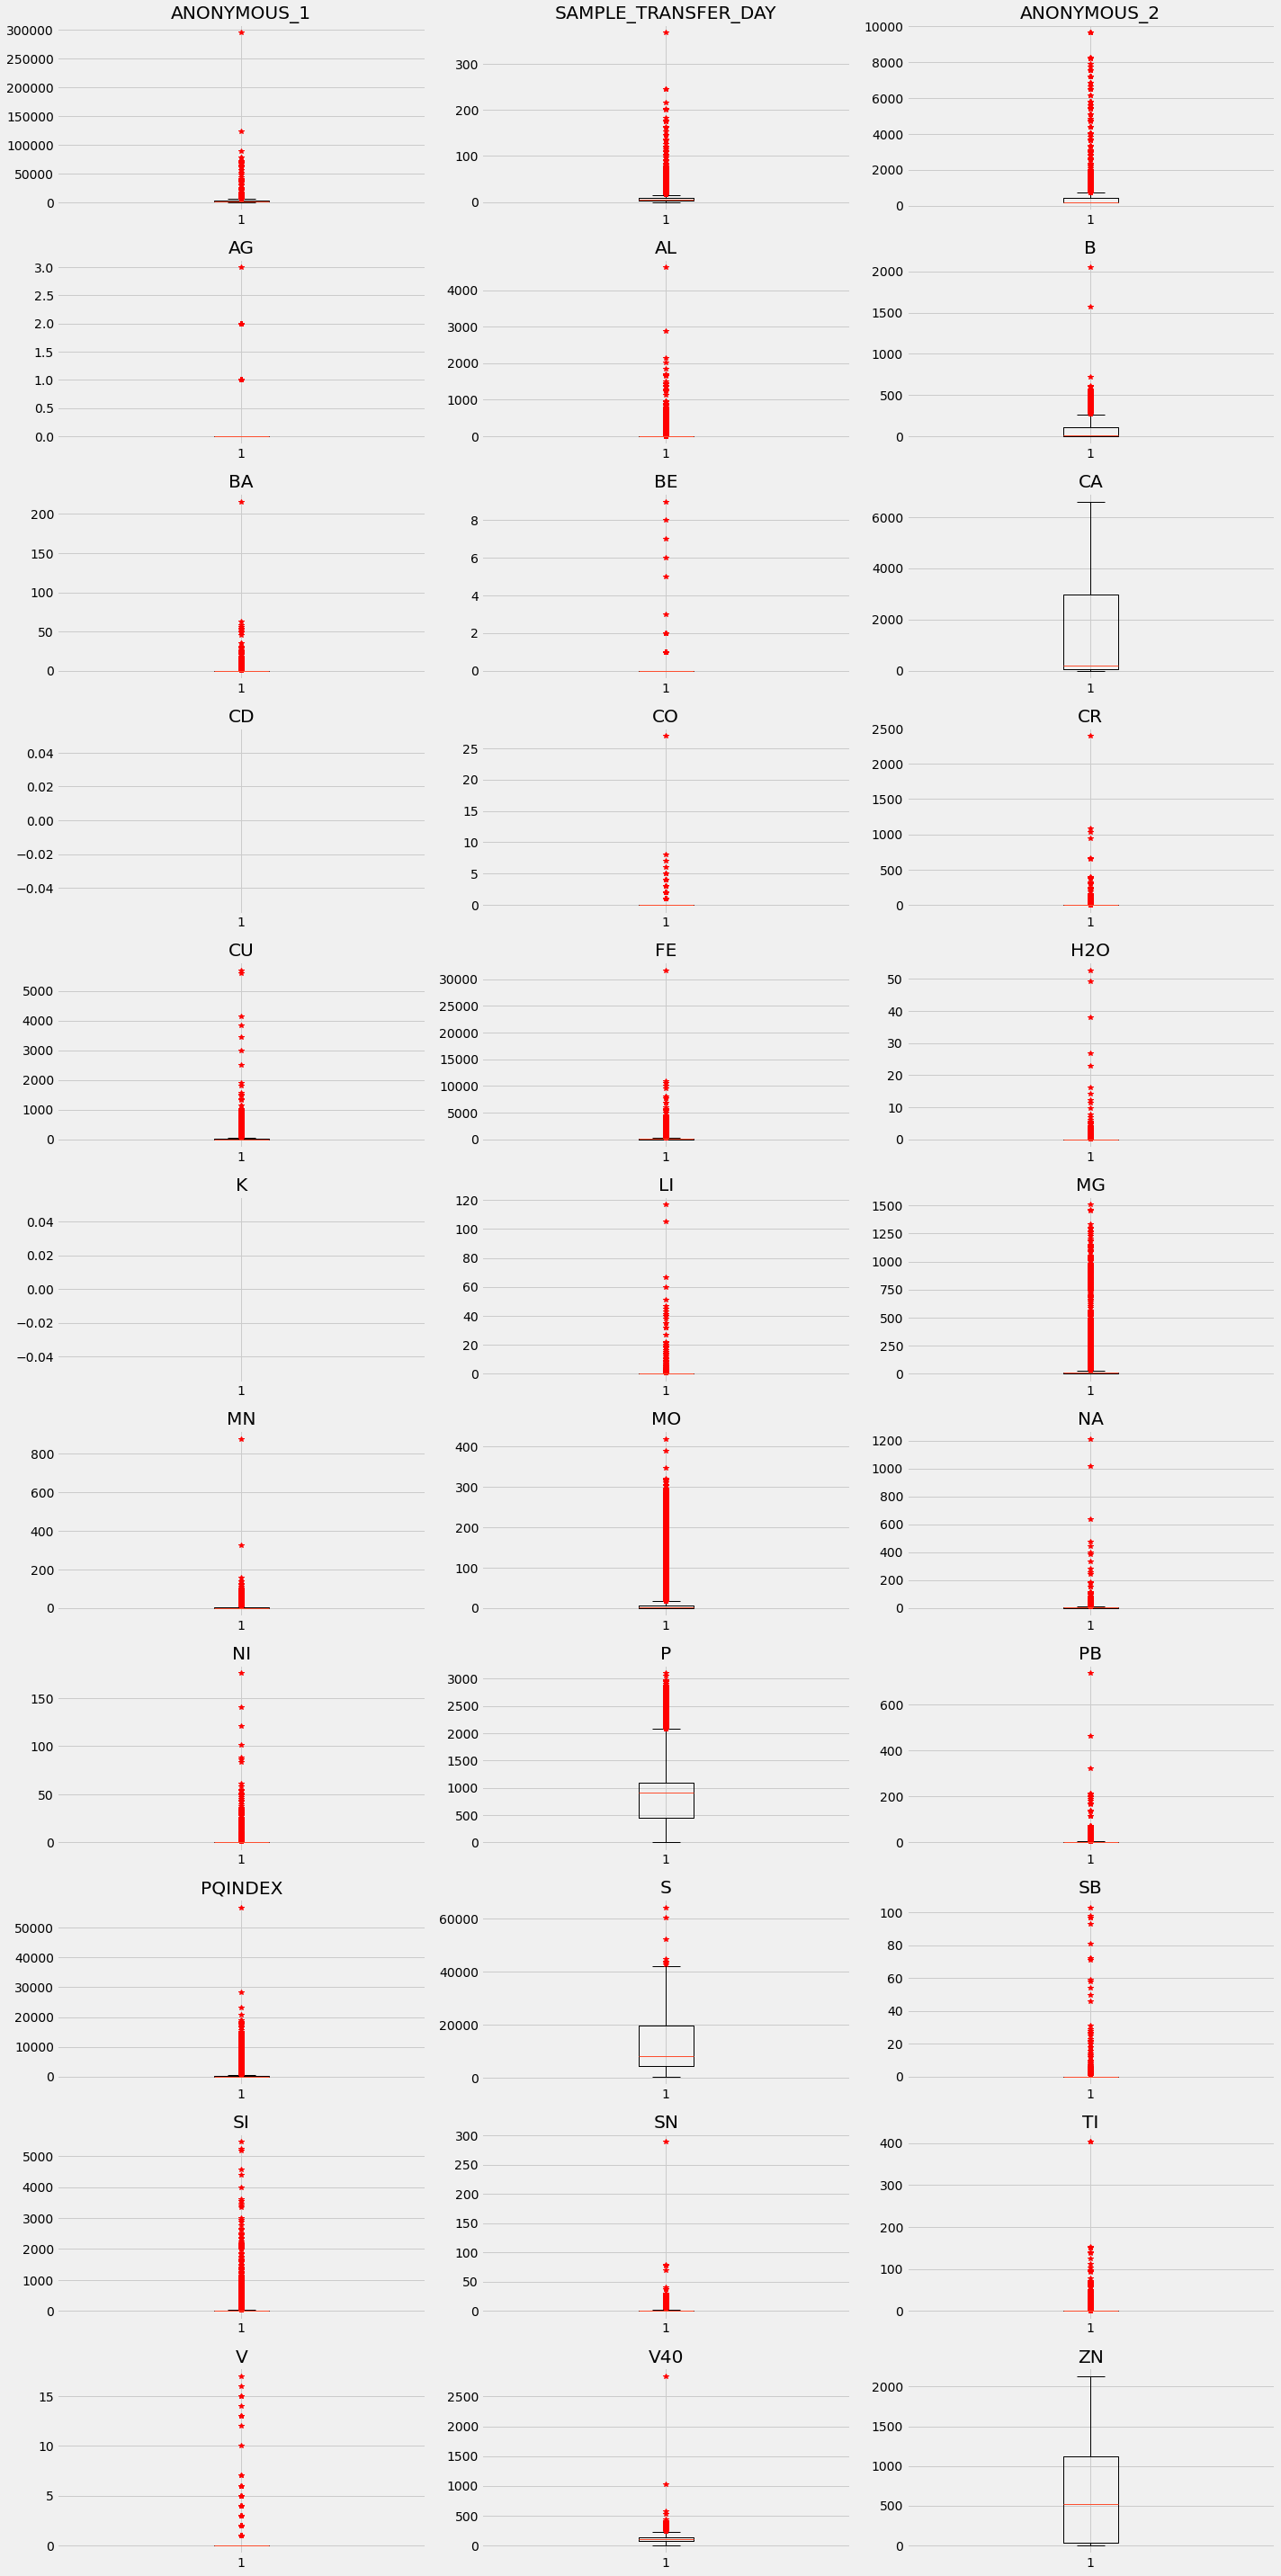

In [17]:
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(20, 40))
for ax, col in zip(axes.flatten(), numerical_features):
    if col in train.columns:
        ax.boxplot(train[col], sym='r*')   #s ym='r*'는 이상치(outlier)들을 빨간색 별표로 표시하도록 지정
        ax.set_title(col)
plt.tight_layout() # subplot의 레이아웃이 자동으로 최적화되어 더 나은 시각화를 가능
plt.show()

- 위의 boxplot을 참고하면 대부분의 데이터에서 Outlier 값이 매우 많은 것을 확인할 수 있다.
- 따라서 outlier 값을 제거하게 되면 데이터의 대부분이 소실되어 정확한 데이터 정보 파악이 불가능해 outlier 값을 포함해 데이터 시각화를 진행했다.

#4.데이터 시각화

## Anomaly 비율 시각화

Anomaly : 일반적인 패턴에서 벗어난 이상한 동작 또는 이벤트

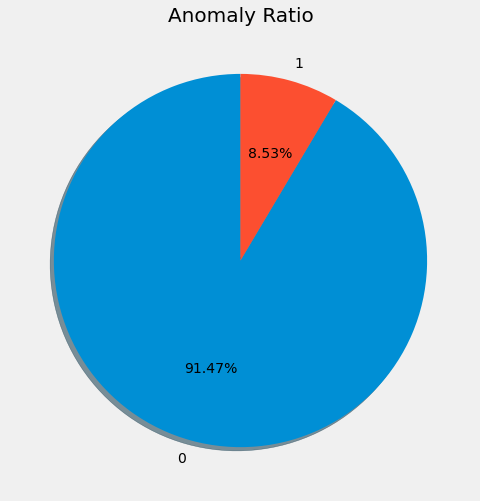

In [18]:
plt.subplots(figsize = (8,8))
plt.pie(train['Y_LABEL'].value_counts(), labels =train['Y_LABEL'].value_counts().index,
        autopct="%.2f%%",shadow = True, startangle =90)
plt.title('Anomaly Ratio', size = 20)
plt.show()

- Y_LABEL : 오일 정상 여부(0 : 정상, 1 : 이상)
- 데이터의 개수가 다르기 때문에 이를 반영한 그래프 해석이 필요하다.

## Feature 시각화

### categorical 변수의 그래프


In [19]:
#이상치 유무에 따른 차이를 보기 위한 데이터 분류
train_0=train[train['Y_LABEL']==0]
train_1=train[train['Y_LABEL']==1]

- COMPONENT_ARBITRARY : sample 오일 관련 부품 (Component 4종)

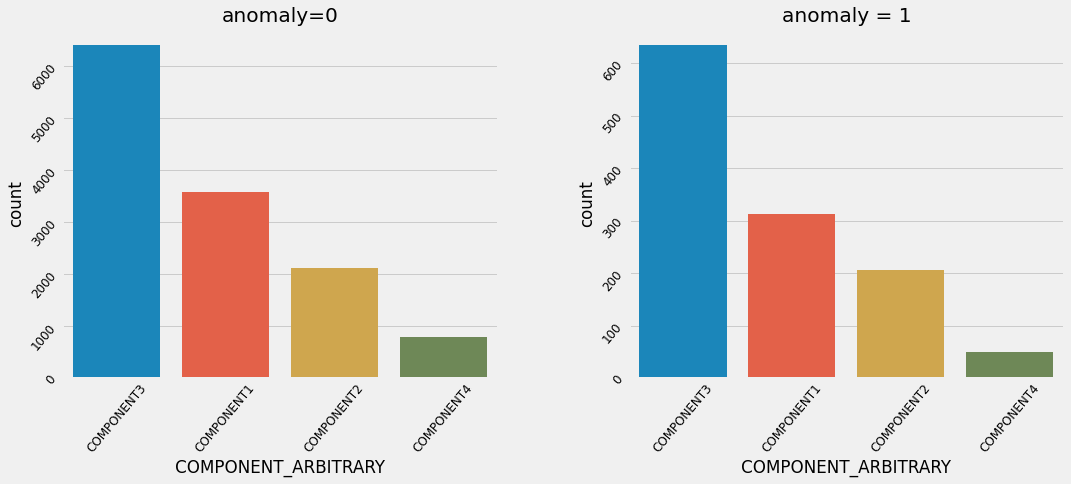

In [29]:
#'COMPONENT_ARBITRARY' #Test Feature
fig, ax = plt.subplots(1,2, figsize=(16,6))

sns.countplot(x = 'COMPONENT_ARBITRARY',
              data = train_0,
              ax = ax[0],
              order = train_0['COMPONENT_ARBITRARY'].value_counts().index)
ax[0].tick_params(labelsize= 12) #x,y축 라벨글자 사이즈
ax[0].set_title('anomaly=0')
ax[0].set_ylabel('count')
ax[0].tick_params(rotation=50) # x,y축 라벨글자 회전전
sns.countplot(x = 'COMPONENT_ARBITRARY',
              data = train_1,
              ax = ax[1],
              order = train_1['COMPONENT_ARBITRARY'].value_counts().index)
ax[1].tick_params(labelsize=12)
ax[1].set_title('anomaly = 1')
ax[1].set_ylabel('count')
ax[1].tick_params(rotation=50)


plt.subplots_adjust(wspace=0.3, hspace=0.3) # subplot 간의 간격을 조절
plt.show()

- 'COMPONENT_ARBITRARY'에 따른 anomaly 값의 차이는 존재하지 않는다고 볼 수 있다.

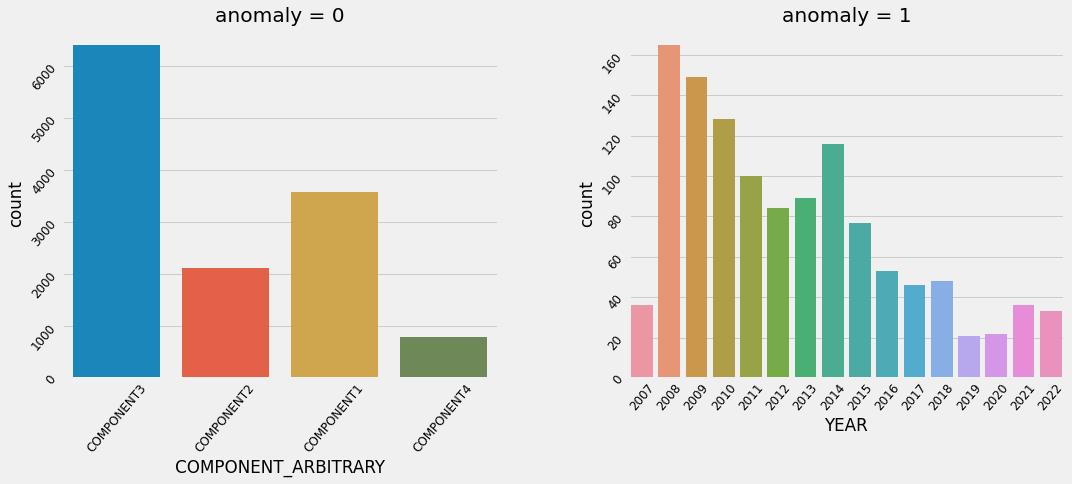

In [31]:
# 'Year' #Test Feature
fig, ax = plt.subplots(1, 2, figsize=(16, 6))


sns.countplot(x = 'YEAR',
                data = train_0,
                ax = ax[0])
# cpuntplot : 빈도 막대그래프
ax[0].tick_params(labelsize=12)
ax[0].set_title('anomaly = 0')
ax[0].set_ylabel('count')
ax[0].tick_params(rotation=50)


sns.countplot(x = 'YEAR',
              data = train_1,
              ax = ax[1])
ax[1].tick_params(labelsize=12)
ax[1].set_title('anomaly = 1')
ax[1].set_ylabel('count')
ax[1].tick_params(rotation=50)


plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

- 'YEAR'에 따른 anomaly는 년도별로 편차가 있음을 확인할 수 있다.

### numerical 변수의 그래프
Test 데이터의 feature에 해당하는 feature는 빨강색 그래프를 가진다.

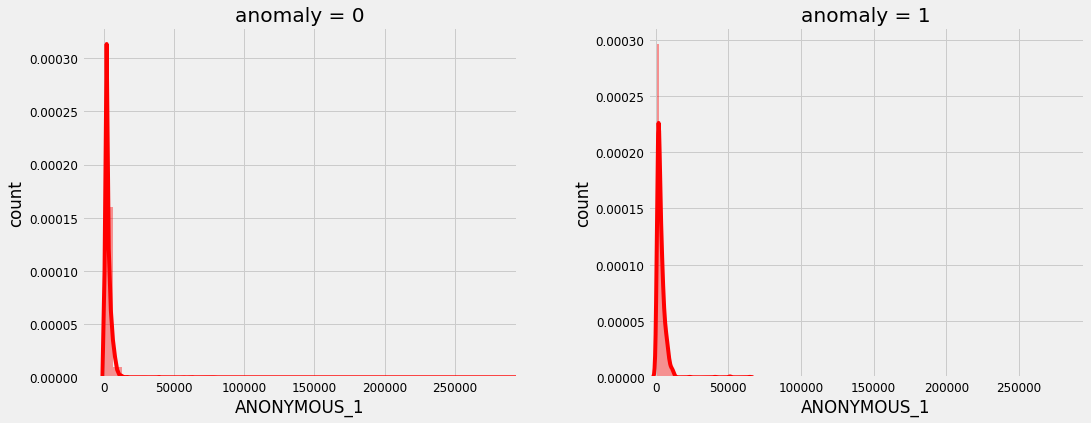

In [32]:
# Numerical 그래프 함수 정의
def num_plot(train, train_0, train_1, column):
  
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    if column in test_features :
        color = 'red'
    else :
        color = 'blue'

    sns.distplot(train_0[column], color = color,
                ax = axes[0])
    # distplot : 연속된 수치형 데이터가 아닌 히스토그램을 보기 위한 함수
    #            도수분포표로 그래프로 나타낸 것
    axes[0].tick_params(labelsize=12)
    axes[0].set_title('anomaly = 0')
    axes[0].set_ylabel('count')
    axes[0].set_xlim(None,train[column].max()) 
    #첫 번째 인자는 x축의 최소값이고 두 번째 인자는 x축의 최대값

    sns.distplot(train_1[column], color = color,
                ax = axes[1])
    axes[1].tick_params(labelsize=12)
    axes[1].set_title('anomaly = 1')
    axes[1].set_ylabel('count')
    axes[1].set_xlim(None,train[column].max())


    plt.subplots_adjust(wspace=0.3, hspace=0.3)

num_plot(train, train_0, train_1,'ANONYMOUS_1')

- anomaly = 0인 경우에 ANONYMOUS_1이이 0에 가까운 데이터의 수가 더 많았다.
- 또한 anomaly = 0인 경우의 outlier 편차가 더 크다는 사실을 확인할 수 있다.

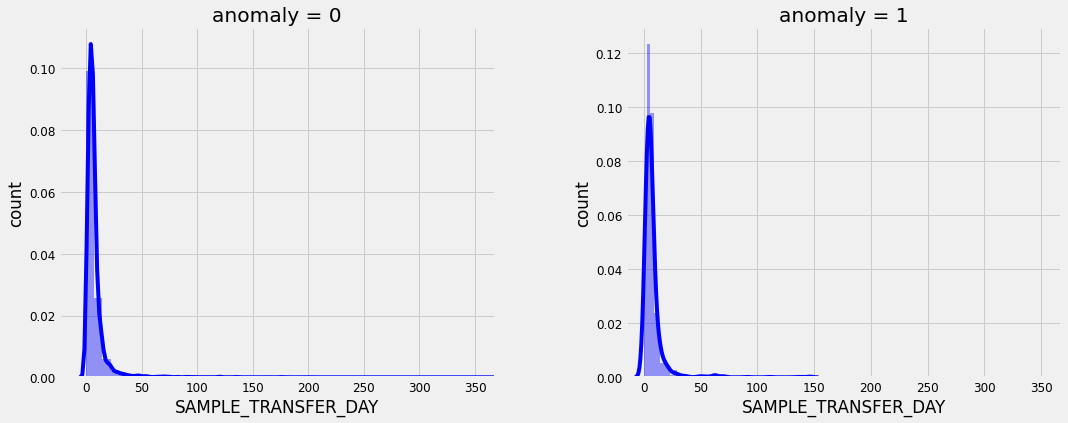

In [35]:
num_plot(train, train_0, train_1,'SAMPLE_TRANSFER_DAY')

- anomaly = 0인 경우에 SAMPLE_TRANSFER_DAY가 0에 가까운 데이터의 수가 더 많았다.
- 또한 anomaly = 0인 경우의 outlier 편차가 더 크다는 사실을 확인할 수 있다.

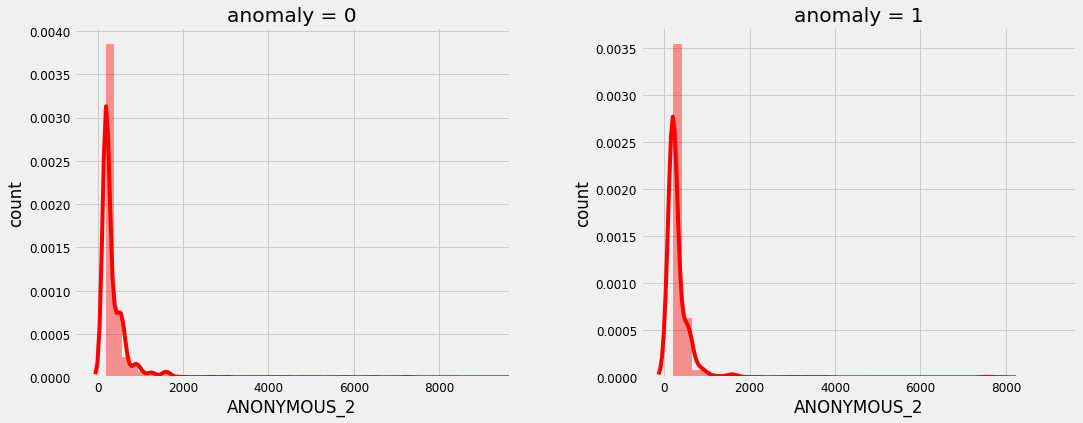

In [36]:
num_plot(train, train_0, train_1,'ANONYMOUS_2')

- anomaly = 0인 경우에 ANONYMOUS_2가 0에 가까운 데이터의 수가 더 많았다.

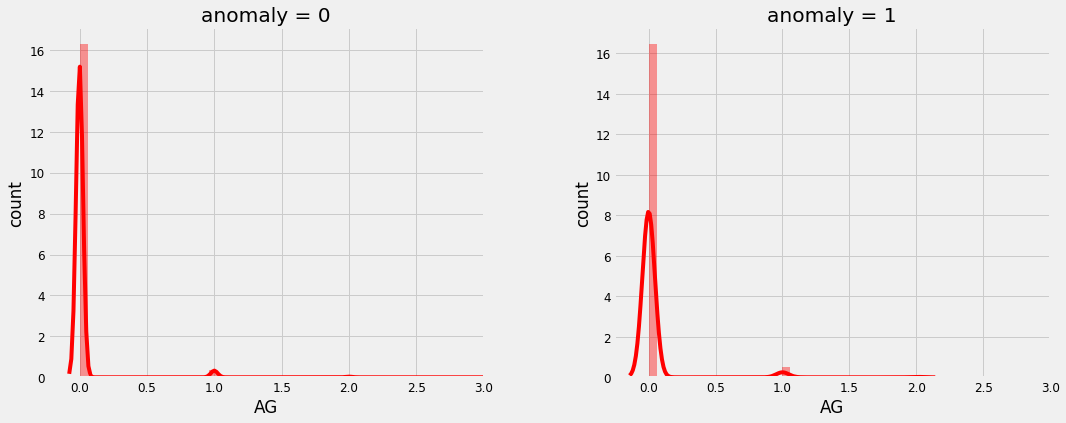

In [37]:
num_plot(train, train_0, train_1,'AG')

- anomaly = 0일 때, 은의 양이 0에 가까운 데이터가 많음을 확인할 수 있다.

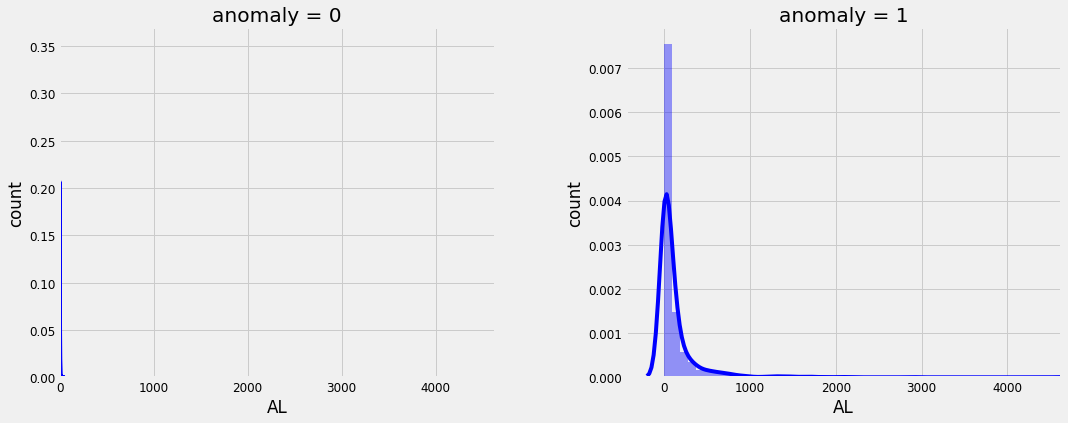

In [38]:
num_plot(train, train_0, train_1,'AL')

- 데이터의 경향성을 파악하기 어려운 그래프 형태를 띈다.
- 두 그래프 모두 알루미늄 함유량이 0에 가까울 경우가 많음을 알 수 있다

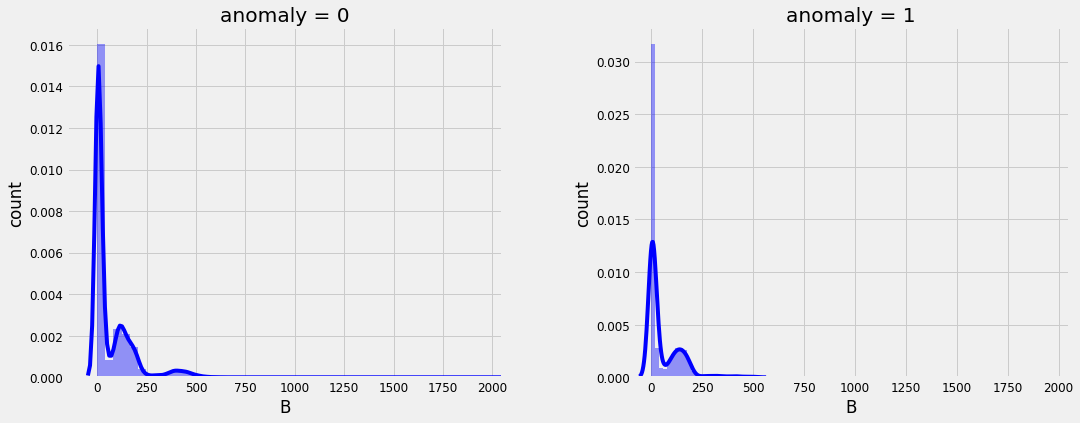

In [39]:
num_plot(train, train_0, train_1,'B')

- anomaly = 0인 경우의 outlier 편차가 더 크고 250~500 사이의 데이터가 많음을 확인할 수 있다.

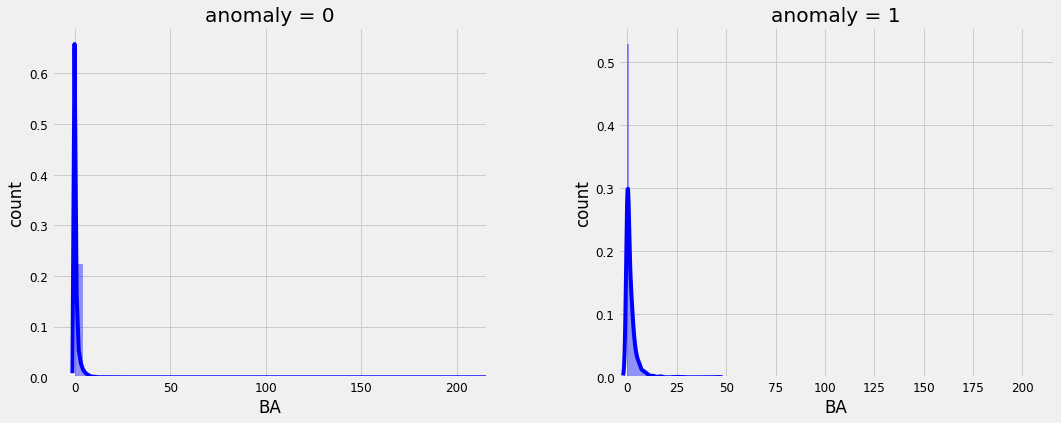

In [40]:
num_plot(train, train_0, train_1,'BA')

- anomaly = 0일 때, 바륨의 양이 0에 가까운 데이터가 더 많음을 확인할 수 있다.

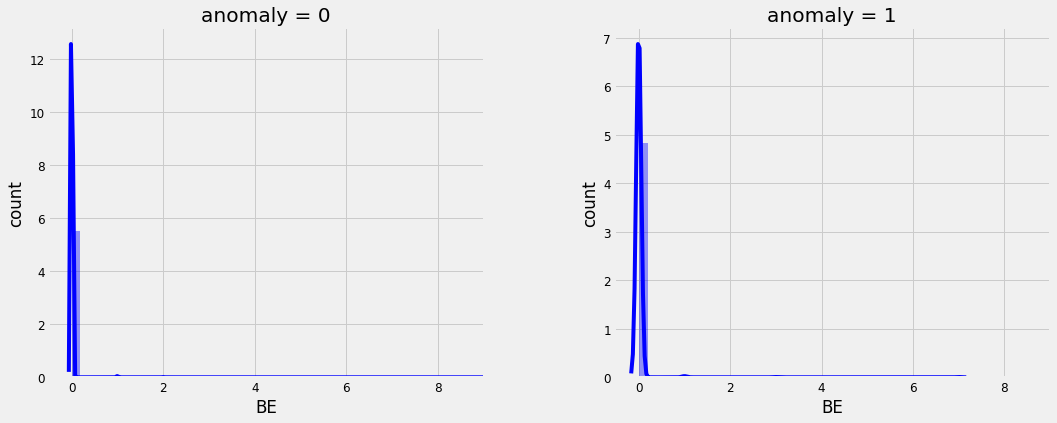

In [41]:
num_plot(train, train_0, train_1,'BE')

- anomaly = 0일 때, 베릴륨의 양이 0에 가까운 데이터가 더 많음을 확인할 수 있다.

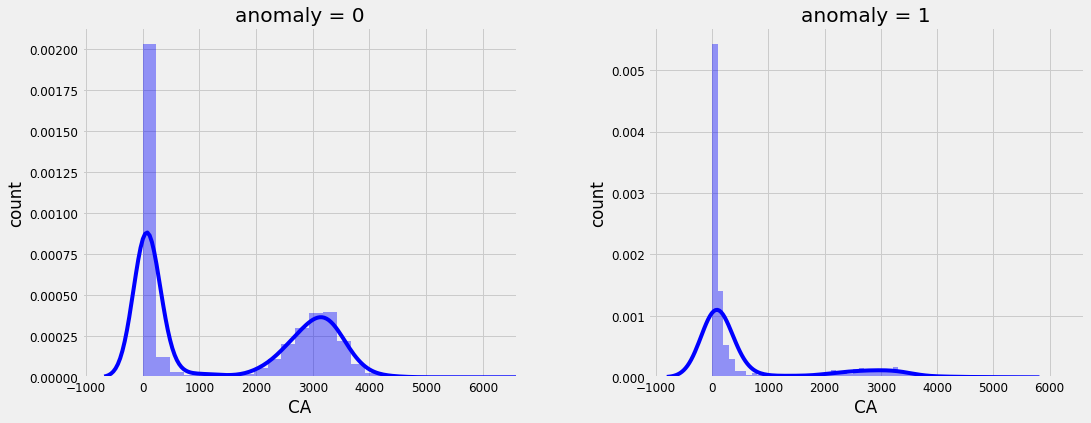

In [42]:
num_plot(train, train_0, train_1,'CA')

-anomaly = 0인 경우, 칼슘의 양이 2000~4000 사이인 경우가 눈에 띄게 많음을 확인 할 수 있다.

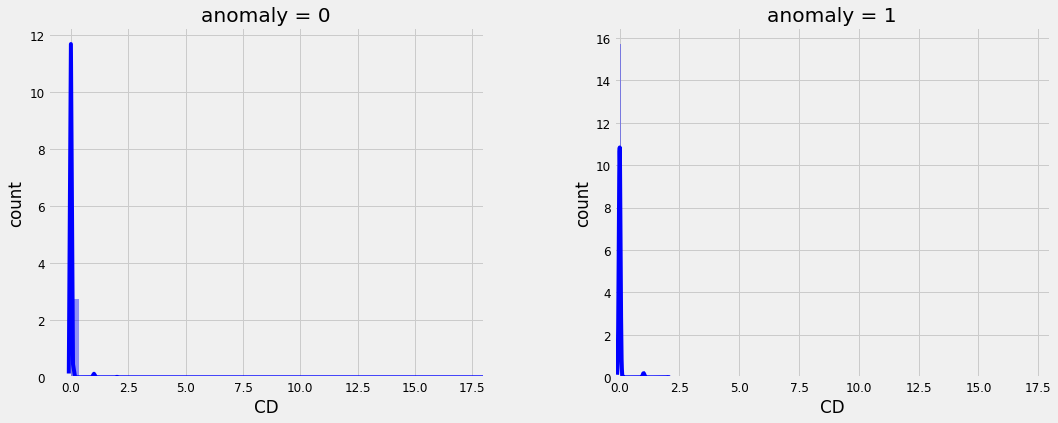

In [43]:
num_plot(train, train_0, train_1,'CD')

- 두 데이터가 비슷한 형태의 그래프를 가진다.

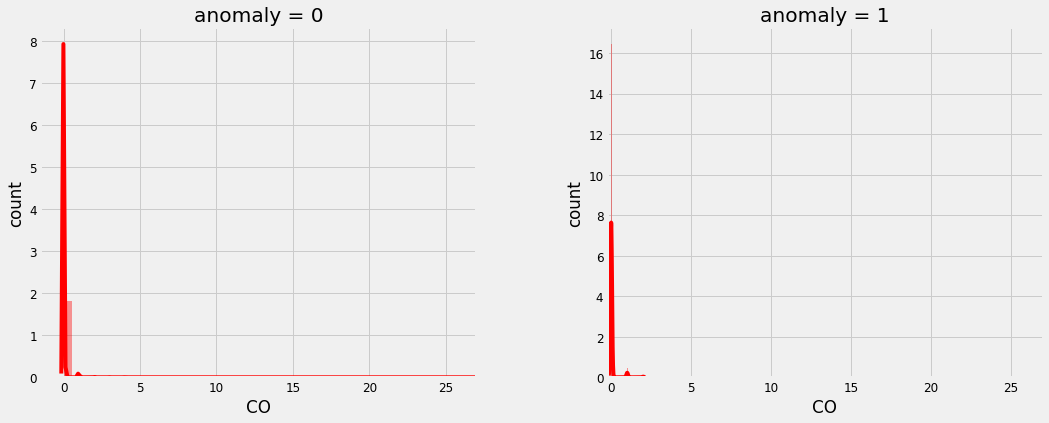

In [44]:
num_plot(train, train_0, train_1,'CO')

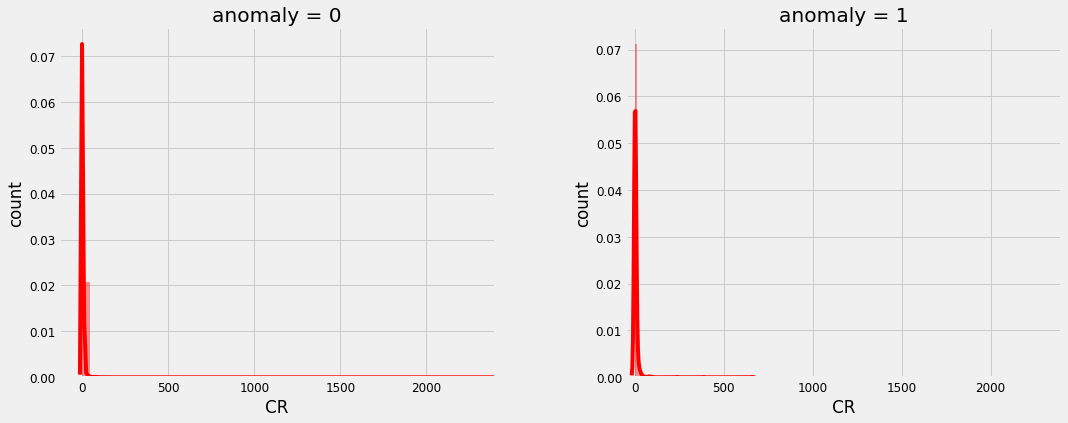

In [45]:
num_plot(train, train_0, train_1,'CR')

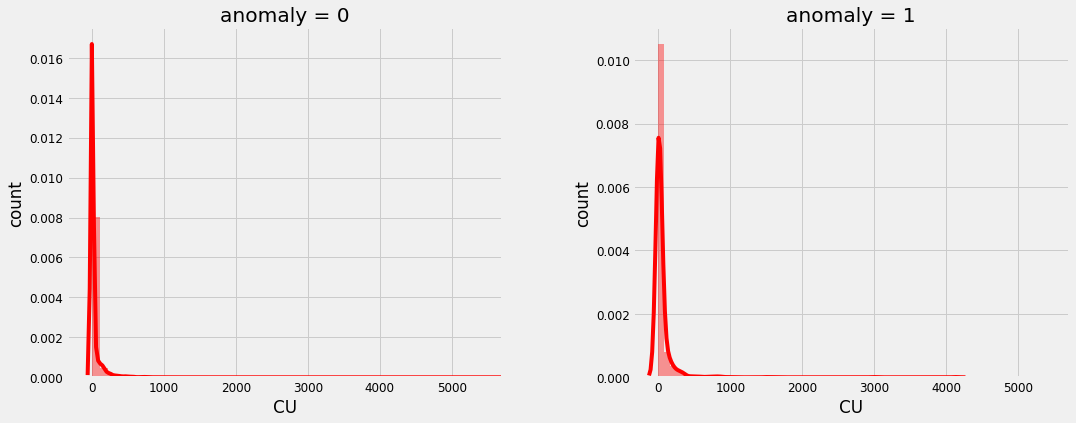

In [46]:
num_plot(train, train_0, train_1,'CU')

- anomaly = 0일 때, 구리의 양이 0에 가까운 경우가 많다.

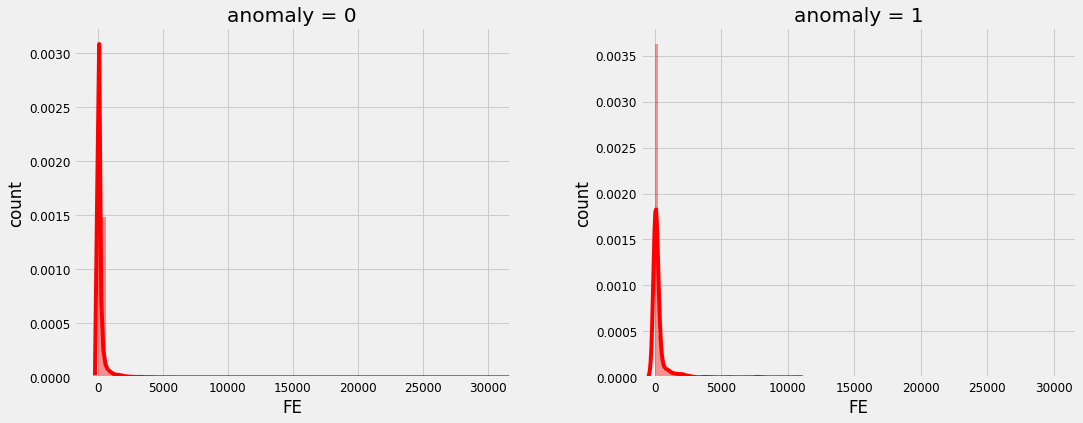

In [47]:
num_plot(train, train_0, train_1,'FE')

- anomaly = 0일 때,철의 함유량이 0에 가까운 경우가 많다.

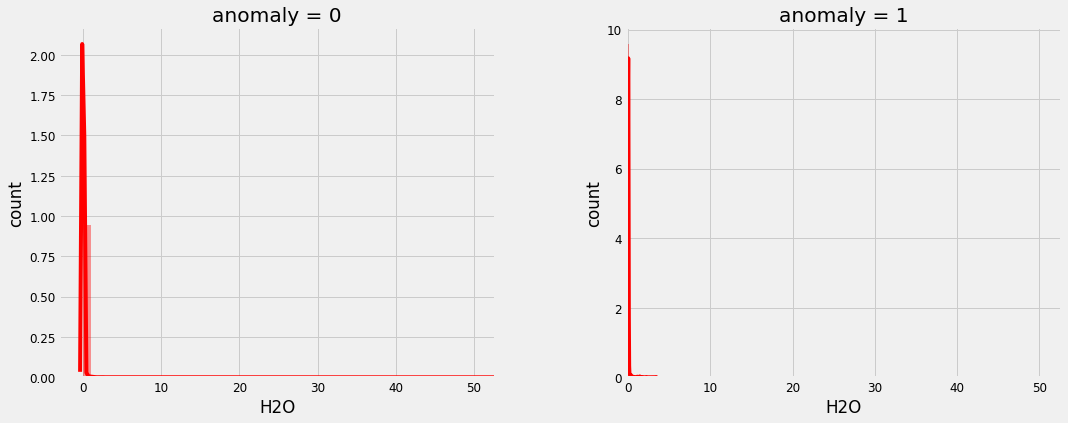

In [49]:
num_plot(train, train_0, train_1,'H2O')

- anomaly = 1일 때, 물의 함유량이 0에 가까운 경우가 많다.

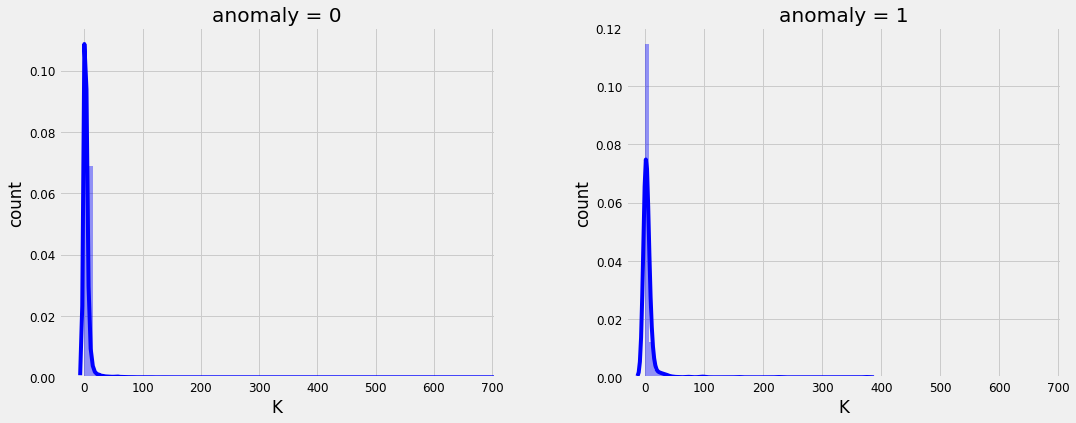

In [50]:
num_plot(train, train_0, train_1,'K')

- anomaly = 0일 때, 칼륨의 함유량이 0에 가까운 경우가 많다.

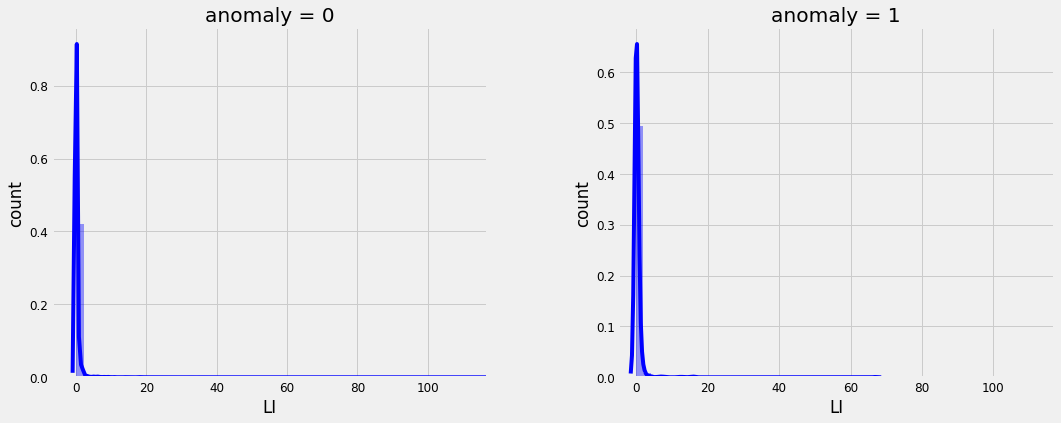

In [51]:
num_plot(train, train_0, train_1,'LI')

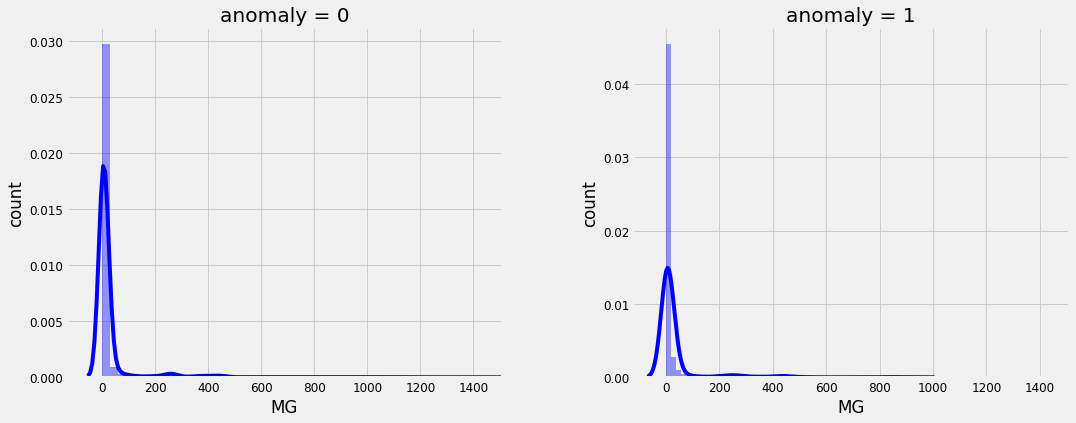

In [52]:
num_plot(train, train_0, train_1,'MG')

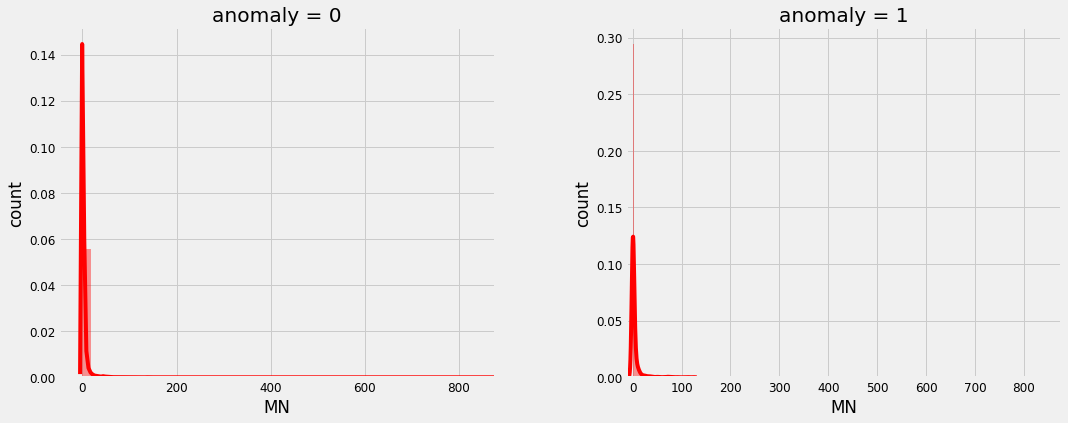

In [53]:
num_plot(train, train_0, train_1,'MN')

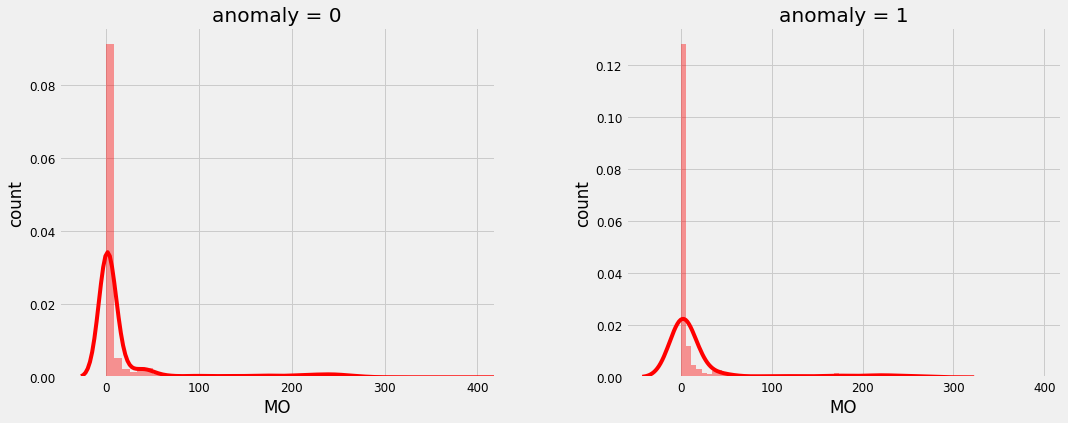

In [54]:
num_plot(train, train_0, train_1,'MO')

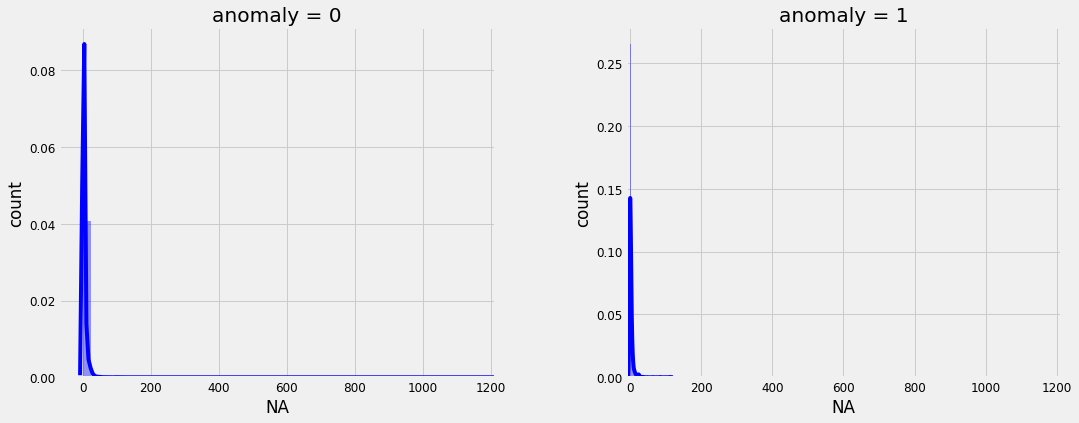

In [55]:
num_plot(train, train_0, train_1,'NA')

- anomaly = 1일 때, 나트륨의 함유량이 0에 가까운 경우가 많다.

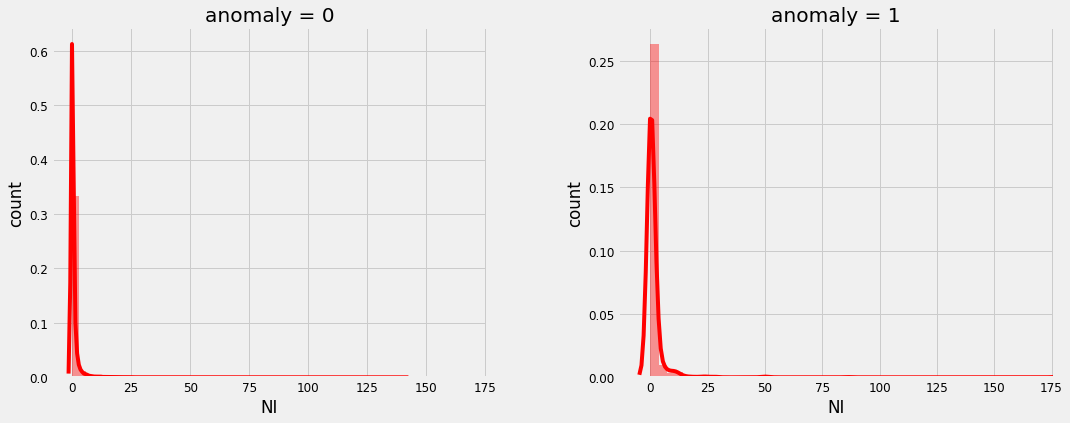

In [56]:
num_plot(train, train_0, train_1,'NI')

- anomaly = 0일 때, 니켈의 함유량이 0에 가까운 경우가 많다.

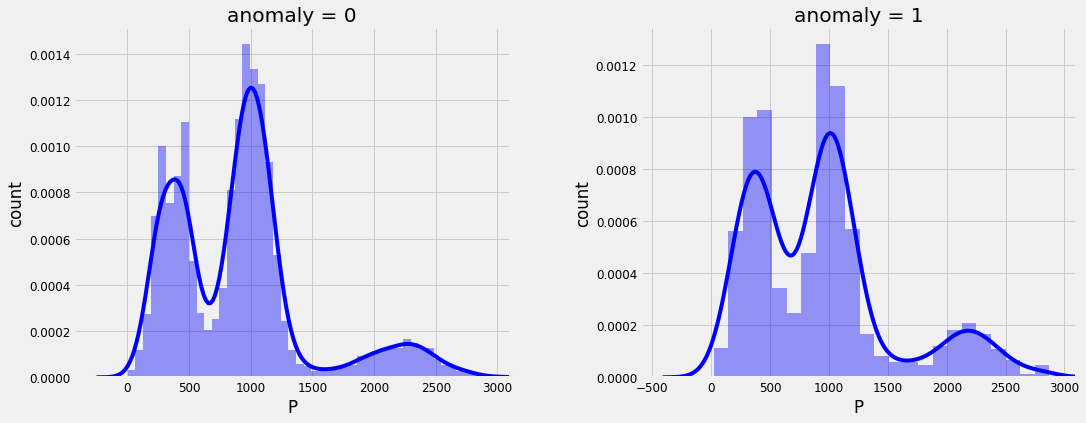

In [57]:
num_plot(train, train_0, train_1,'P')

- 그래프의 경향성은 대체로 비슷하나 anomaly = 1일 때 인의 함유량이 500 ~ 875인 경우가 상대적으로 많고, 인의 함유량이 875 ~ 1500인 경우가 상대적으로 적다.

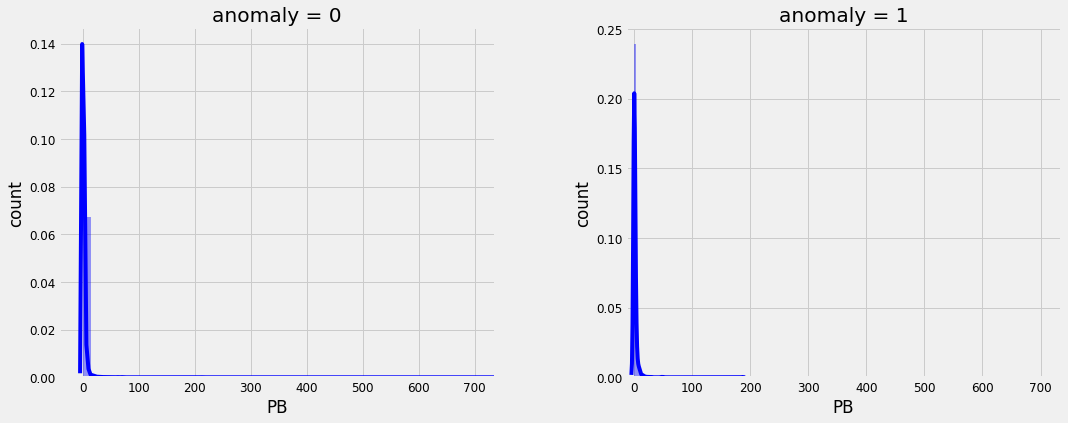

In [58]:
num_plot(train, train_0, train_1,'PB')

- anomaly = 1일 때, 납의 함유량이 0에 가까운 경우가 많다.

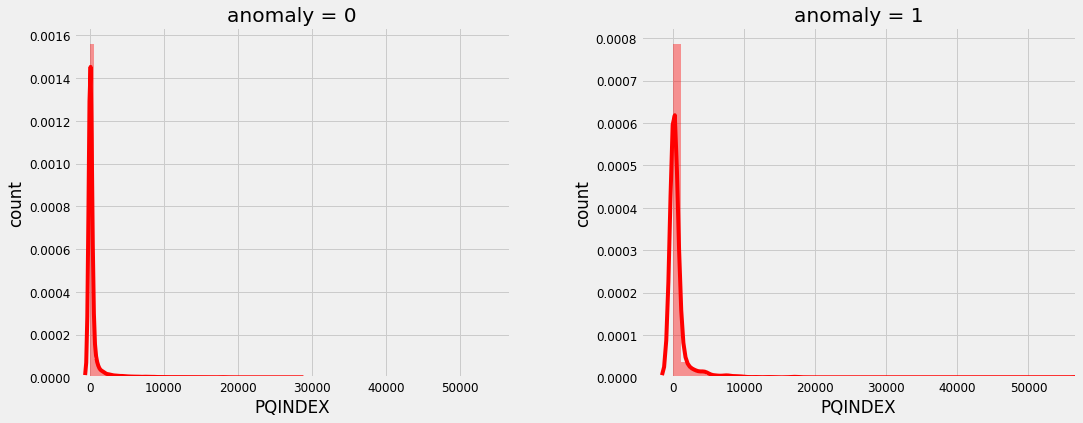

In [59]:
num_plot(train, train_0, train_1,'PQINDEX')

- anomaly = 0일 때, 입자 정량화 지수가 0에 가까운 경우가 많다.

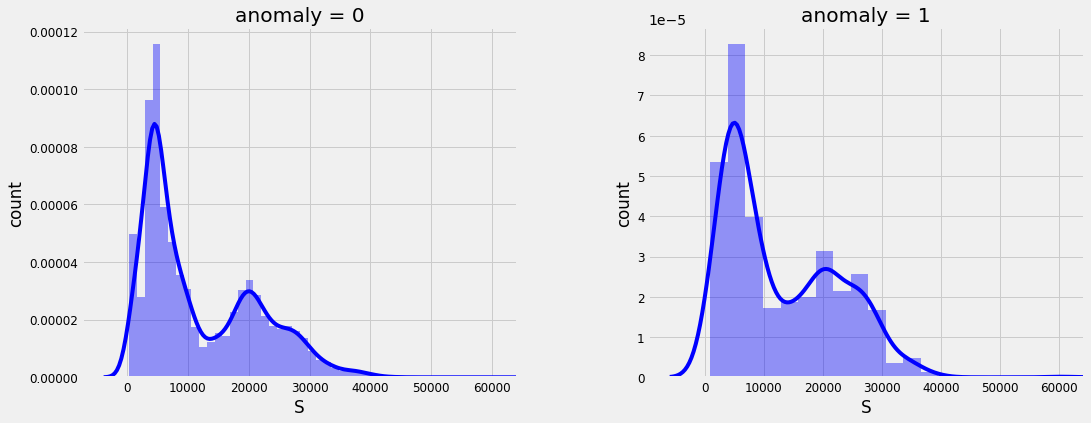

In [60]:
num_plot(train, train_0, train_1,'S')

- 그래프의 경향성은 대체로 비슷하나 anomaly = 1일 때 황의 함유량이 20000~30000인 경우가 상대적으로 많다.

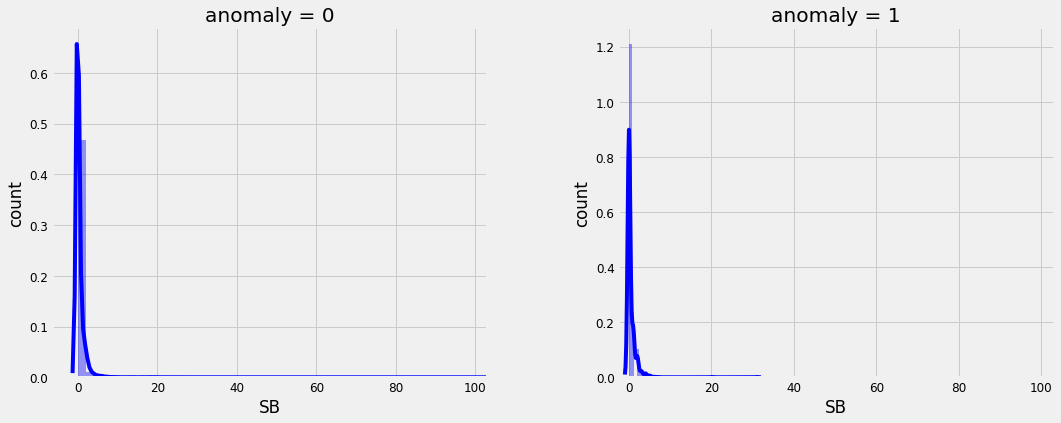

In [61]:
num_plot(train, train_0, train_1,'SB')

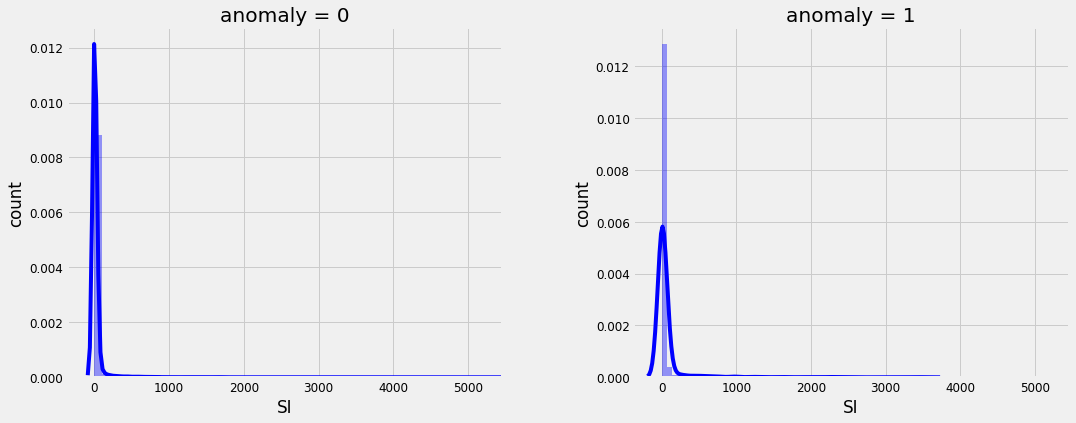

In [62]:
num_plot(train, train_0, train_1,'SI')

- anomaly = 0일 때, 규소의 함유량이 0에 가까운 경우가 많다.

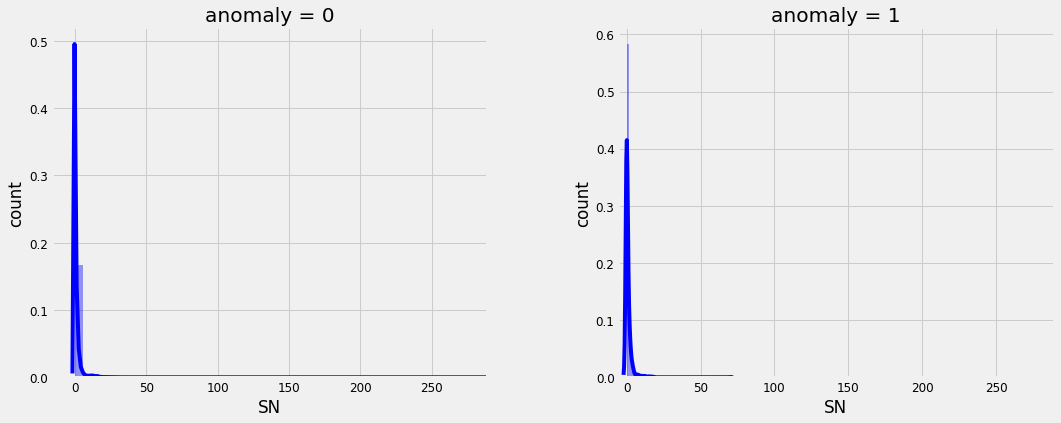

In [63]:
num_plot(train, train_0, train_1,'SN')

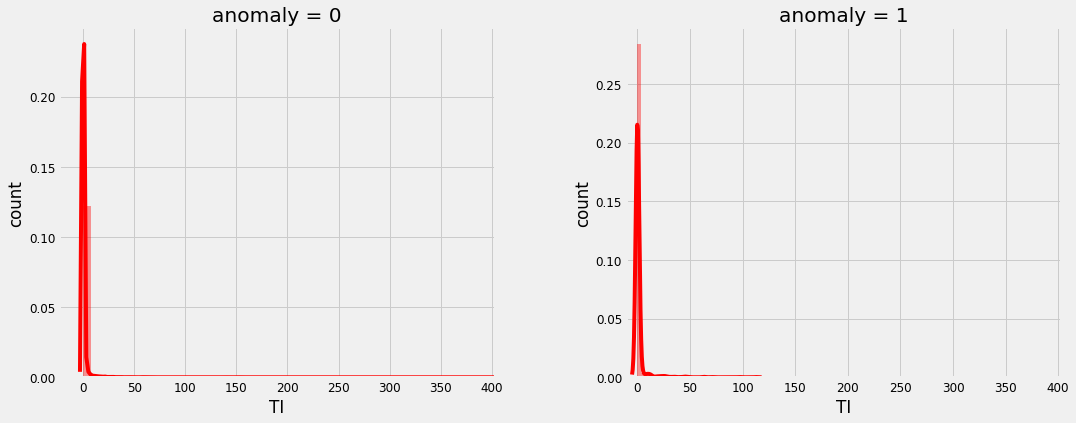

In [64]:
num_plot(train, train_0, train_1,'TI')

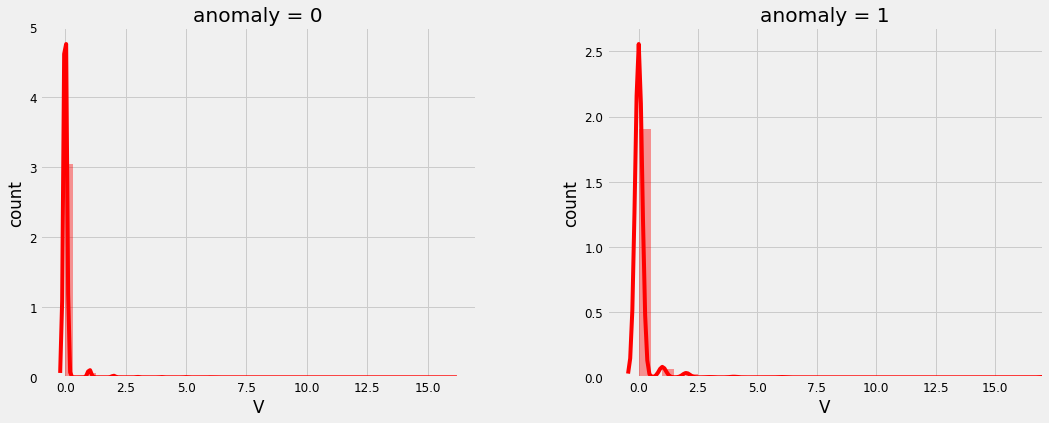

In [65]:
num_plot(train, train_0, train_1,'V')

- 그래프의 경향성은 대체로 비슷하나 anomaly = 1일 때 바나듐의 함유량이 0에 가까운 경우가 상대적으로 적고, 바나듐의 함유량이 0 ~ 2.5인 경우가 상대적으로 많다.

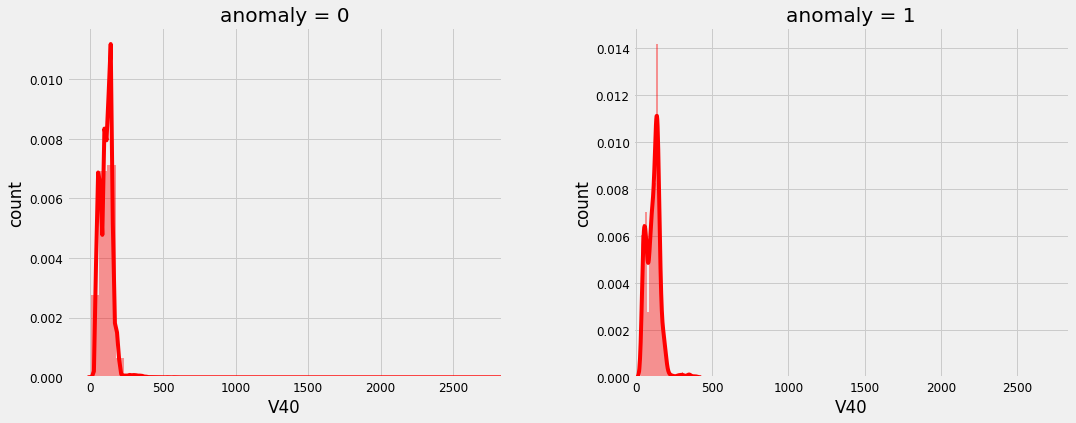

In [66]:
num_plot(train, train_0, train_1,'V40')

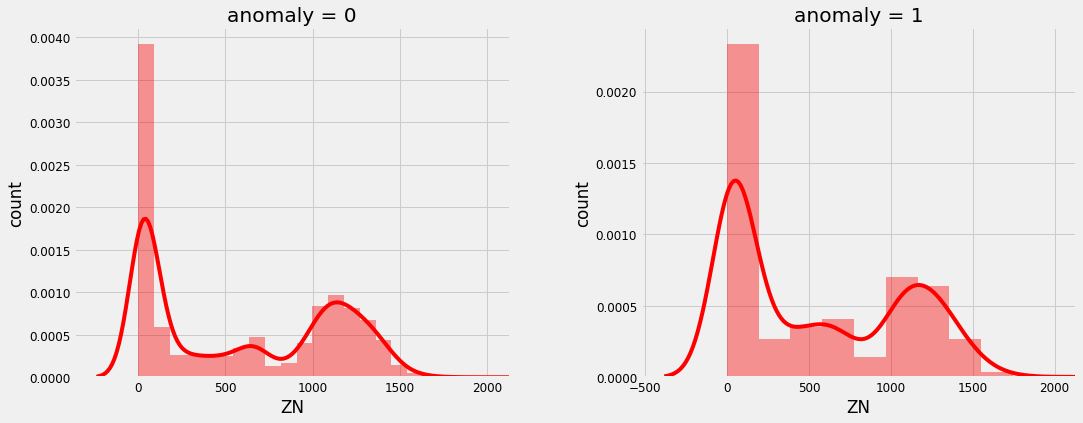

In [67]:
num_plot(train, train_0, train_1,'ZN')

- 대부분의 feature가 anomaly 여부에 관계없이 비슷한 경향을 띈다.
- 대부분의 feature에서 anomaly = 0일 때, outlier의 분포가 더 크다.
- Test 데이터에 포함되는 feature와 Test 데이터에 포함되지 않는 feature 간의 유의미한 차이점은 찾아볼 수 없다.

## 상관관계 

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [70]:
train_corr = train.drop(train[categorical_features], axis=1)

- categorical_features = ['ID','COMPONENT_ARBITRARY','YEAR', 'Y_LABEL']

In [71]:
train_corr['Y_LABEL'] = train['Y_LABEL']
# Y_LABEL을 object형에서 int형으로 변환
train_corr = train_corr.astype({'Y_LABEL' : 'int'}) # 'Y_LABEL' 컬럼을 정수형(int)으로 형변환
corr = train_corr.corr(method='pearson') 

### corr() 메소드
해당 객체의 각 컬럼들 간의 상관관계를 계산



### Pearson 상관계수

(Pearson correlation coefficient)

는 두 변수 간의 선형적 관계를 측정하기 위한 통계적 지표입니다.

- Pearson 상관계수는 -1에서 1 사이의 값을 가지며, 1에 가까울수록 두 변수 간의 양의 선형관계가 강하고, -1에 가까울수록 두 변수 간의 음의 선형관계가 강합니다. 상관계수가 0이면 두 변수 간의 선형적인 관계가 없다는 것을 의미합니다.


<Axes: >

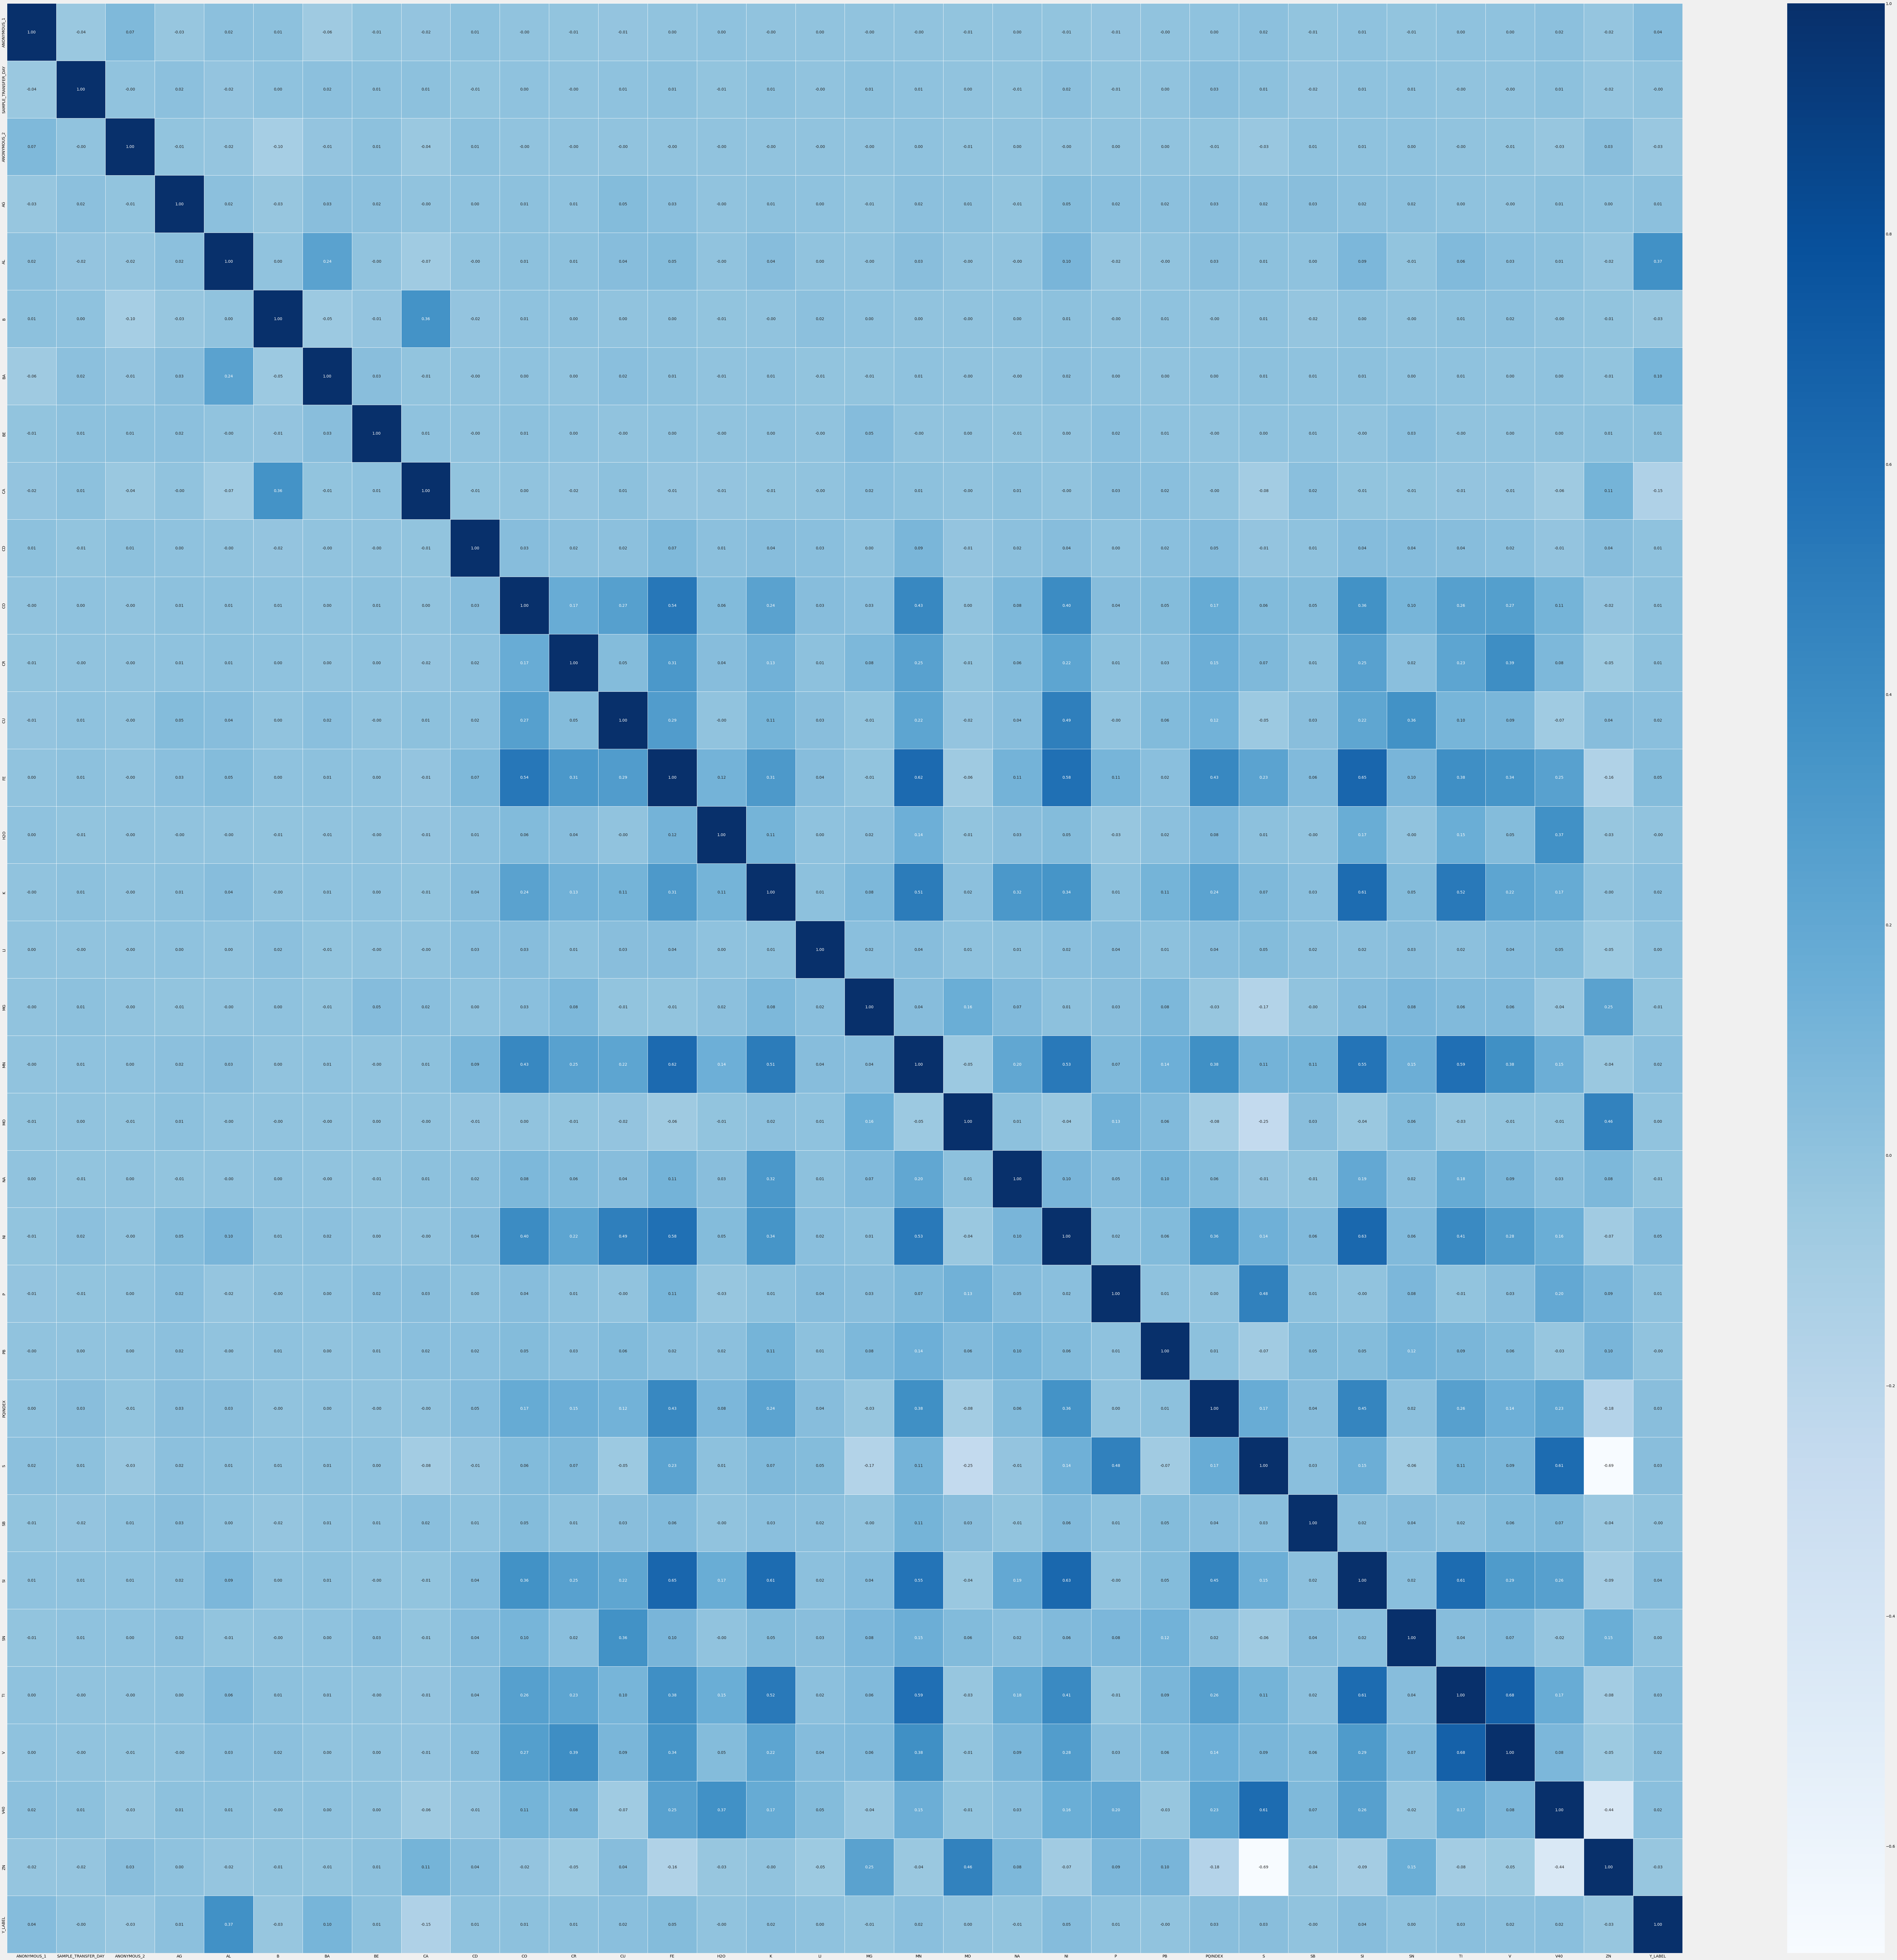

In [72]:
plt.figure(figsize=(120,120))
sns.heatmap(data=corr, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
# heatmap : 히트맵 그래프 , 데이터의 값을 색상으로 나타내는 그래프

- annot 매개변수는 각 셀에 값을 표시할지 여부를 지정하며, True로 지정하면 값이 표시
- 소수점 이하 2자리까지 표시하도록 '.2f'로 지정
- linewidths 매개변수는 셀들 사이의 경계선 두께를 지정

In [73]:
correlation = corr.unstack() 
train_temp = pd.DataFrame(correlation['Y_LABEL'].sort_values(ascending=False), columns=['Y_LABEL'])
# ascending=False : 내림차순으로 정렬
train_temp.style.background_gradient(cmap='viridis') #각 셀의 색상은 상관계수 값의 크기에 따라 다르게 표현

,Y_LABEL
Y_LABEL,1.000000
AL,0.370512
BA,0.104840
FE,0.047992
NI,0.046806
ANONYMOUS_1,0.044197
SI,0.036731
PQINDEX,0.028966
S,0.027923
TI,0.025637


### unstack() 메소드  
'corr' 변수의 상관계수 행렬을 하나의 Series 객체로 변환합니다. 

이 때, Series 객체의 인덱스는 ('Y_LABEL', 'Y_LABEL')와 같은 튜플 형태로 표현됩니다.

- heatmap과 위의 표를 참고했을 때, Y_LABEL과 가장 연관성이 큰 feature는 AL이고 이는 알루미늄 함유량이 Y_LABEL, 즉 anolmaly 값에 가장 많은 영향을 미침을 알 수 있다. 하지만 관계계수의 값이 커 큰 영향을 끼친다고 할 수 없다.
- 또한 상관관계 분석에서는 Y_LABEL에 큰 영향을 주는 feature가 거의 없는 것을 확인할 수 있다.

# 5.결론
1. 정상치와 이상치의 비율이 지나치게 Imbalance하다.
2. 'AL'과 같이 test에는 존재하지 않는 feature들의 영향이 크므로 Teacher모델 훈련시에 이러한 feature들을 얼마나 잘 활용하느냐가 관건인 것 같다.
3. 주어진 데이터 자체가 많이 치우쳐 있으므로 Tree기반의 Ensemble 모델 혹은 딥러닝 모델의 성능이 좋을 것으로 판단되고 이러한 모델들을 활용할 때에 전처리 유무는 categorical 변수 외에는 크게 성능의 차이가 없는 것으로 보인다.
4. train에 과적합된 모델을 얼마나 test셋에 대하여 일반화를 잘 수행하는지가 Score 상승의 열쇠이다.